In [2]:
from lattice import Lattice2D, BrickwallLatticeGeometry, SimulationParameters, RectangularLatticeGeometry, SimulationData
import numpy as np

def E(t):
    return np.sin(omega*t)

omega = 2*np.pi / 3.5
params = SimulationParameters(1, E, np.array([0, -1]), 1e-3, 50, 1, 0.5, 1)
l = Lattice2D(BrickwallLatticeGeometry((7, 14)), params)

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


# simulate

In [2]:
l.evolve(solver="rk4", force_reevolve=True)

100%|██████████| 50000/50000 [00:30<00:00, 1619.87it/s]


In [3]:
l.save("results/brickwall_7x14_omega_3-5.lattice")

In [4]:
l.save_lattice_animation("results/brickwall_7x14_omega_3-5.gif", sample_every=411, fps=10)

Generating animation: 100%|██████████| 122/122 [02:36<00:00,  1.28s/frame]


# plots

In [2]:
l = Lattice2D.load("results/brickwall_7x14_omega_3-5.lattice")

In [3]:
data = SimulationData.from_lattice(l, omega=omega, cutoff_freq=5*omega)

(<Figure size 1000x1400 with 5 Axes>,
 array([<Axes: ylabel='$P_x(t)$'>, <Axes: ylabel='$dP_x/dt$'>,
        <Axes: ylabel='$P_{\\rm orb, y}(t)$'>,
        <Axes: ylabel='$dP_{\\rm orb, y}(t)/dt$'>,
        <Axes: xlabel='t', ylabel='$\\nabla q_{\\rm orb}(t)$'>],
       dtype=object))

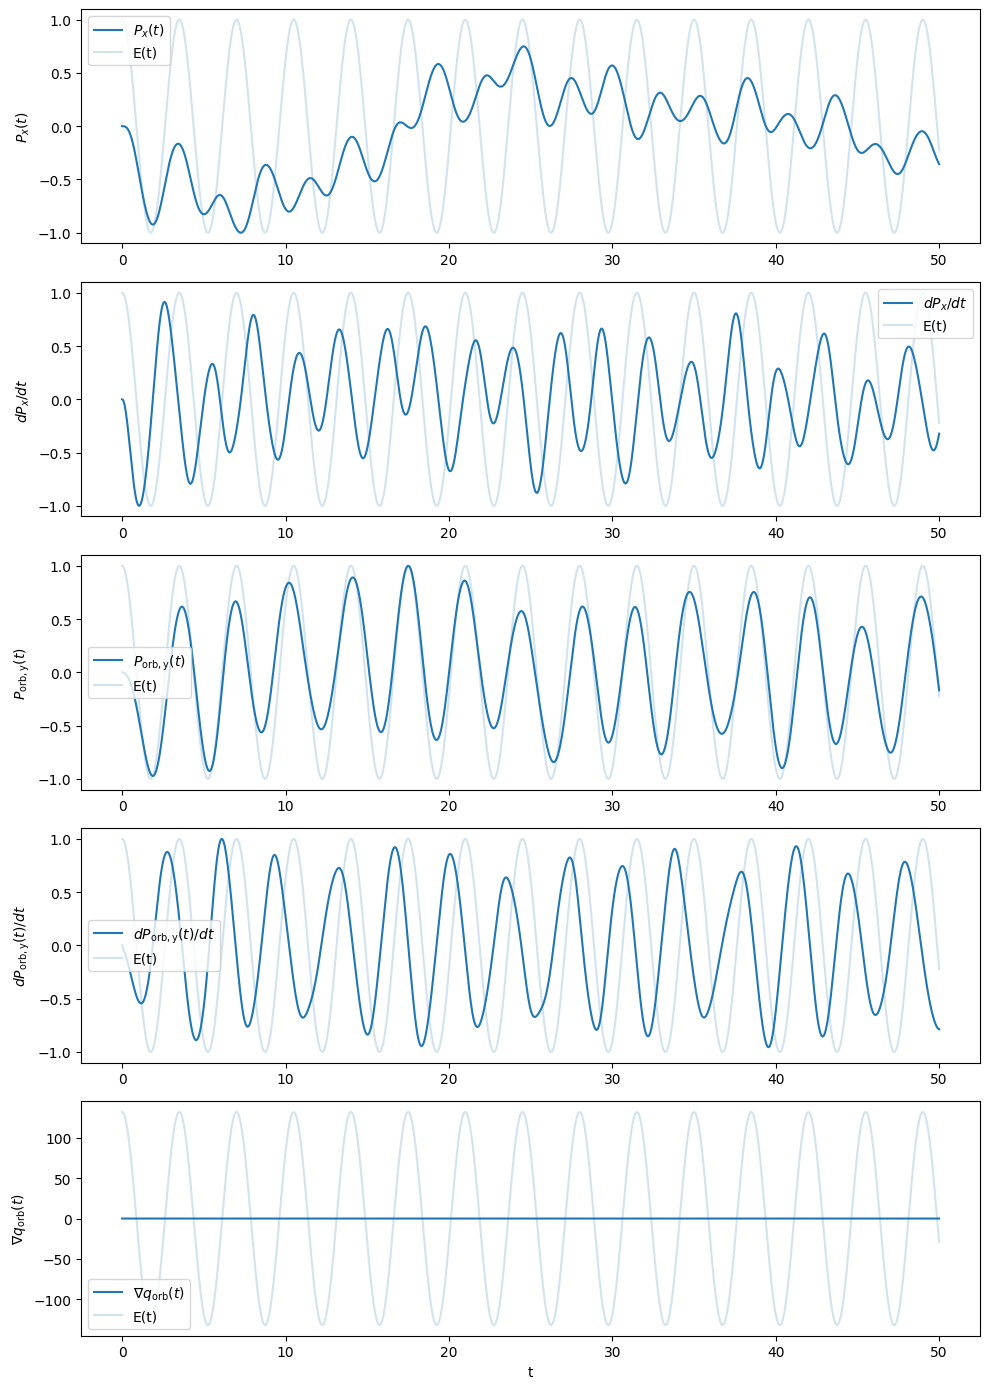

In [4]:
data.plot_simulation_time_series()
# plt.savefig("results/brickwall_7x14_omega_3-5_time_series.pdf")
# plt.show()

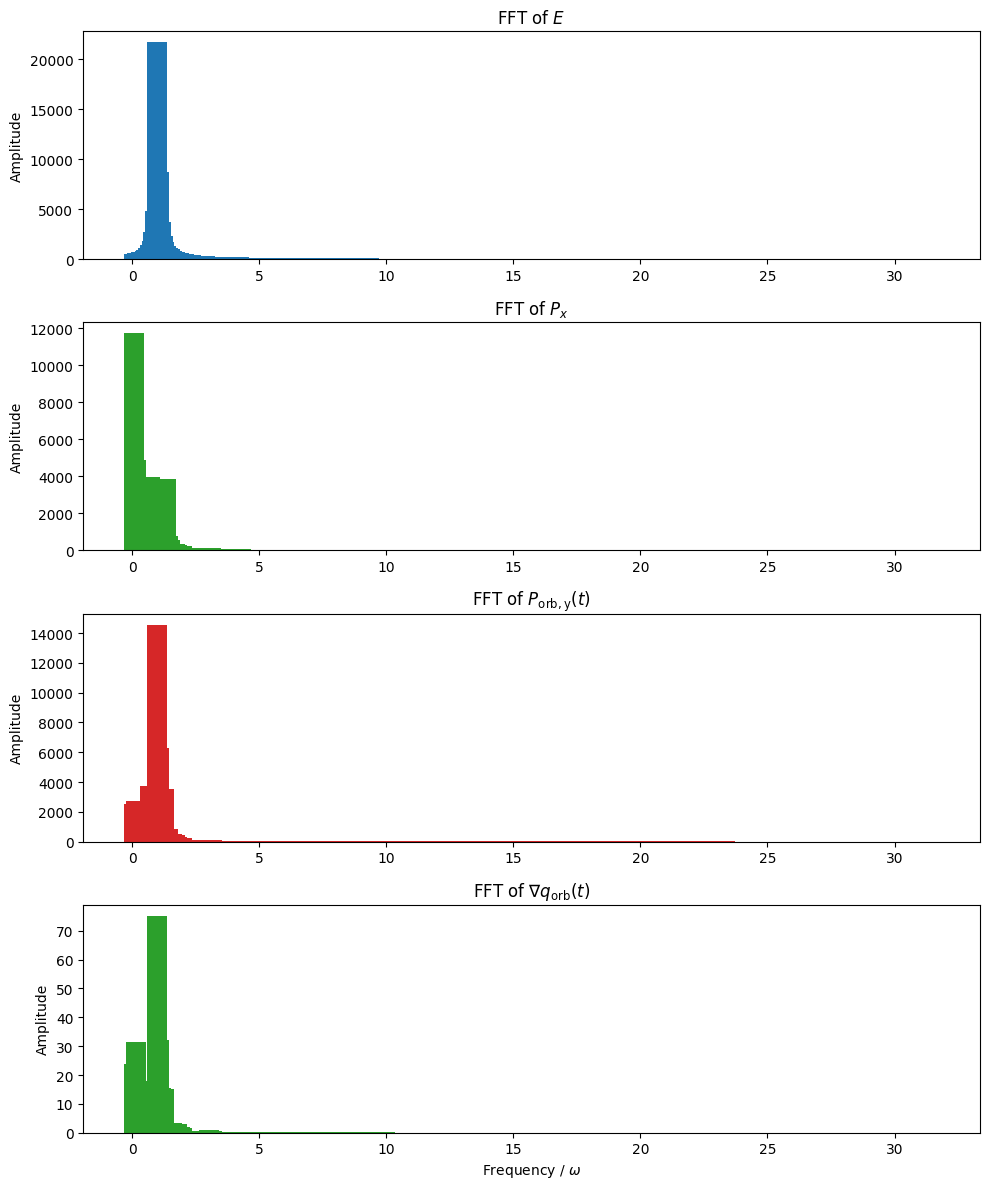

In [9]:
plot_simulation_fft(data)
plt.savefig("results/brickwall_7x14_omega_3-5_fft.pdf")
plt.show()

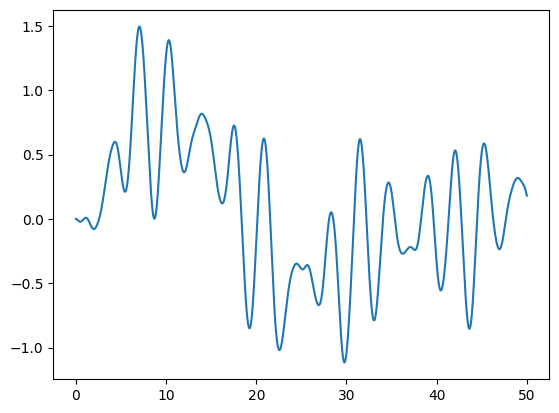

In [14]:
diff = data.M_grad[:, 0]/np.max(np.abs(data.M_grad[:, 0])) - data.P/np.max(np.abs(data.P))
plt.plot(data.t, diff)